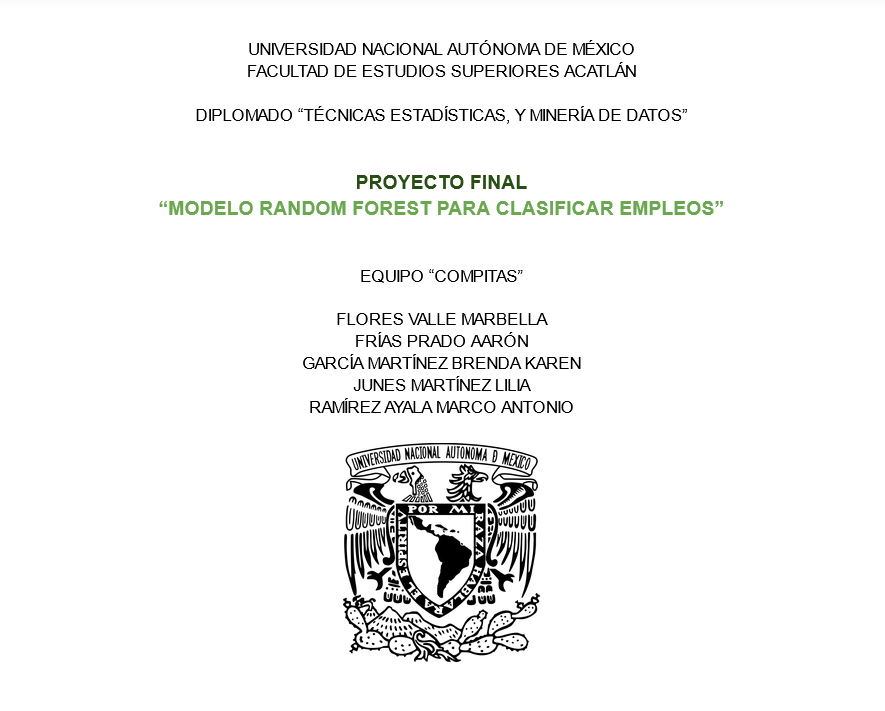



*   **Entendimiento del caso de estudio:** 

La búsqueda de empleo ideal hoy en día requiere de una ardua inversión de tiempo, más aún cuando se es recién egresado y no se tiene conocimiento sobre el área a aplicar.
Para facilitar esta búsqueda, seleccionamos algunas características tales como los conocimientos, experiencia, etc, las cuales nos ayudarán a  construir un modelo que nos indique el puesto que tenga mayor afinidad al usuario.

*   **Entendimiento de los datos:** 

De acuerdo a la oferta laboral actual encontrada en distintos sitios web, construimos una base de datos, con las siguientes variables:
Compañía: Nombre de la compañía que solicita al empleadx.
Salario: Expectativa salarial.
Experiencia: Tiempo laborado.
Puesto: El puesto para el que se solicita la vacante.
Habilidades: Habilidades técnicas necesarias para el puesto.

*   **Preprocesamiento de datos:** 

Se procesaron varias veces los datos , ya que se tuvieron que unificar algunas características.
Los tipos de datos  no correspondian para hacer algunos análisis, por lo que se modificaron.
Se realizaron varias limpiezas y respaldos.

*   **Modelado:** 

Se implementó un modelo de clasificación y uno de regresión, de random forest.

*   **Evaluación:** 

Una de las métricas más importantes es el accuracy que nos indica la precisión del modelo.

*   **Validación:** 

El modelo no es bueno porque son pocos datos y no se ajustan bien.





A continuación se encuentra el código que implementamos, así como su explicación : 

#Análisis exploratorio de datos (EDA)

###Paqueterías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import re

from pandas.api.types import is_string_dtype, is_numeric_dtype
from random import sample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

###Base de datos

Abrimos nuestra base desde un google sheets, el link es el siguiente: https://docs.google.com/spreadsheets/d/1kunsJDUL4iFGoAuoyRBenMKElGZtO000R6lwtwUxVEs/edit?usp=sharing 

In [2]:

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('puestosDataScience2022').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

SpreadsheetNotFound: ignored

In [ ]:
df.head()

,ID,Compañía (ID),Salario,Experiencia,Puesto,Puesto_2,Herramientas requeridas para análisis de datos,Herramientas_cont
0,Requerimientos de preprocesamiento:,,"Tipo de dato: numérico\nDominio (R): {0, 1000,...","Tipo de dato: numérico \nDominio (R): {0, 1, 2...",Tipo de dato: categórico/cualitativo\nDominio ...,Tipo de dato: categórico/cualitativo\nDominio ...,,
1,1,Gentera,"25.000,00",2,BUSINESS ANALYTICS,Data Analist SR,"Mapinfo, SQL, Visual Basic, R y Phyton (interm...",5
2,2,Gentera,"30.000,00",1,LIDER GOBIERNO DE DATOS,Data Analist SR,SQL (intermedio),1
3,3,Gentera,"45.000,00",2,CIENTÍFICO DE DATOS SR.,Data Scientist SR,"Google o AWS, R, Phyton, Java, VB,",4
4,4,Gentera,"60.000,00",2,DATA ENGINEER,Data Engineer,"SQL, AWS, GCP",3


#### Data basic scanner

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ID                                              62 non-null     object
 1   Compañía (ID)                                   62 non-null     object
 2   Salario                                         62 non-null     object
 3   Experiencia                                     62 non-null     object
 4   Puesto                                          62 non-null     object
 5   Puesto_2                                        62 non-null     object
 6   Herramientas requeridas para análisis de datos  62 non-null     object
 7   Herramientas_cont                               62 non-null     object
dtypes: object(8)
memory usage: 4.0+ KB


In [ ]:
df.describe()

,ID,Compañía (ID),Salario,Experiencia,Puesto,Puesto_2,Herramientas requeridas para análisis de datos,Herramientas_cont
count,62,62,62,62,62,62,62,62
unique,62,57,39,11,46,7,60,12
top,Requerimientos de preprocesamiento:,Gentera,"30.000,00",3,DATA SCIENTIST,Data Scientist SR,Excel,4
freq,1,4,4,20,8,19,2,12


In [ ]:
msno.matrix(df)

In [ ]:
msno.bar(df)

### Feature engineering

In [ ]:
df.columns

Index(['ID', 'Compañía (ID)', 'Salario', 'Experiencia', 'Puesto', 'Puesto_2',
       'Herramientas requeridas para análisis de datos', 'Herramientas_cont'],
      dtype='object')

Eliminamos la fila 0, pues afecta el análisis de nuestros datos

In [ ]:
df=df.drop(0)

Eliminamos la columna Puesto, pues ya hemos unificado los datos en la columna Puesto_2

In [ ]:
df=df.drop(['Puesto'],axis=1)

In [ ]:
df=df.drop(['Herramientas requeridas para análisis de datos'],axis=1)

In [ ]:
df2 = df.copy()

In [ ]:
df2=df2.drop(['ID'],axis=1)

De acuerdo a la información obtenida arriba, observamos que nuestras variables numéricas son tipo objeto, por lo que hay que transformarlas

In [ ]:
df2['Experiencia '] = df2.apply(lambda x: re.sub(',','.',x['Experiencia']),axis=1)
df2['Experiencia '] = pd.to_numeric(df2['Experiencia '])

In [ ]:
df2['Salario']=[(x.replace('.',""))for x in df2['Salario']]
df2['Salario']=[(x.replace(',','.'))for x in df2['Salario']]
df2['Salario']=pd.to_numeric(df2['Salario'])

In [ ]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compañía (ID)      61 non-null     object 
 1   Salario            61 non-null     float64
 2   Experiencia        61 non-null     object 
 3   Puesto_2           61 non-null     object 
 4   Herramientas_cont  61 non-null     object 
 5   Experiencia        61 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.3+ KB


,Compañía (ID),Salario,Experiencia,Puesto_2,Herramientas_cont,Experiencia
1,Gentera,25000.0,2,Data Analist SR,5,2.0
2,Gentera,30000.0,1,Data Analist SR,1,1.0
3,Gentera,45000.0,2,Data Scientist SR,4,2.0
4,Gentera,60000.0,2,Data Engineer,3,2.0
5,UVM,25500.0,5,Data Scientist JR,4,5.0


## Análisis univariado

In [ ]:
numerical = []
categorical = []

for column in df2:
  if is_numeric_dtype(df2[column]):
    numerical.append(column)
  
  elif is_string_dtype(df2[column]):
    categorical.append(column)

print('numerical variables: ', numerical)
print('categorical variables: ', categorical)

numerical variables:  ['Salario', 'Experiencia ']
categorical variables:  ['Compañía (ID)', 'Experiencia', 'Puesto_2', 'Herramientas_cont']


In [ ]:
for column in df2:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical:
    df2[column].plot(kind='hist')

  # categorical variables → bar chart
  elif column in categorical:
    df2[column].value_counts()[:15].plot(kind='bar')

## Análisis multivariado

### Numerical vs numerical

In [ ]:
# numerical vs numerical → heatmap
correlation = df2.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

In [ ]:
# numerical vs numerical → pairplot
sns.pairplot(df2, height=2.5)

### Categorical vs numerical 

In [ ]:
# categorical vs numerical → boxplot

for i in range(0, len(categorical)):
  cat = categorical[i]
  for j in range(0, len(numerical)):
    num = numerical[j]
    plt.figure(figsize=(10,10))
    sns.boxplot(x=cat, y=num, data=df2, palette='GnBu')

In [ ]:
# categorical vs categorical -> countplot

for i in range(0, len(categorical)):
  primary_cat = categorical[i]
  for j in range(0, len(categorical)):
    secondary_cat = categorical[j]
    if secondary_cat != primary_cat:
      plt.figure(figsize=(10,10))
      chart = sns.countplot(data=df2, 
                            x=primary_cat, hue=secondary_cat,
                            palette='GnBu',
                            order=df2[primary_cat].value_counts()[:8].iloc[:10].index)

Para este paso, integramos una nueva matriz donde vemos las habilidades de cada registro:

https://docs.google.com/spreadsheets/d/179R-WVL5x3Jq6qJbH72ig1lOCJlxJQtmeREsc9y2ASg/edit?usp=sharing 

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('matriz').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
df_hab = pd.DataFrame.from_records(rows[1:], columns=rows[0])

Convertimos a tipo númerico nuestras columnas.

In [ ]:
df_hab['Excel']=pd.to_numeric(df_hab['Excel'])
df_hab['Python']=pd.to_numeric(df_hab['Python'])
df_hab['R']=pd.to_numeric(df_hab['R'])
df_hab['SQL']=pd.to_numeric(df_hab['SQL'])
df_hab['Visual Basic']=pd.to_numeric(df_hab['Visual Basic'])
df_hab['HTML']=pd.to_numeric(df_hab['HTML'])
df_hab['Mapinfo']=pd.to_numeric(df_hab['Mapinfo'])
df_hab['Oracle']=pd.to_numeric(df_hab['Oracle'])
df_hab['Java']=pd.to_numeric(df_hab['Java'])
df_hab['Google']=pd.to_numeric(df_hab['Google'])
df_hab['SAS']=pd.to_numeric(df_hab['SAS'])
df_hab['Otras']=pd.to_numeric(df_hab['Otras'])


In [ ]:
df['ID']=pd.to_numeric(df['ID'])
df_hab['ID']=pd.to_numeric(df_hab['ID'])

La unimos con nuestra matriz previa

In [ ]:
df3 = pd.merge(df, df_hab, on='ID')
df3.head(2)

,ID,Compañía (ID),Salario,Experiencia,Puesto_2,Herramientas_cont,Excel,Python,R,SQL,Visual Basic,HTML,Mapinfo,Oracle,Java,Google,SAS,Otras
0,1,Gentera,"25.000,00",2,Data Analist SR,5,0,1,1,1,1,0,1,0,0,0,0,0
1,2,Gentera,"30.000,00",1,Data Analist SR,1,0,0,0,1,0,0,0,0,0,0,0,0


La limpiamos para su uso

In [ ]:
df3=df3.drop(["ID" ,"Compañía (ID)"], axis=1)
df3.head()

,Salario,Experiencia,Puesto_2,Herramientas_cont,Excel,Python,R,SQL,Visual Basic,HTML,Mapinfo,Oracle,Java,Google,SAS,Otras
0,"25.000,00",2,Data Analist SR,5,0,1,1,1,1,0,1,0,0,0,0,0
1,"30.000,00",1,Data Analist SR,1,0,0,0,1,0,0,0,0,0,0,0,0
2,"45.000,00",2,Data Scientist SR,4,0,1,1,0,1,0,0,0,1,1,0,0
3,"60.000,00",2,Data Engineer,3,0,0,0,1,0,0,0,0,0,0,0,1
4,"25.500,00",5,Data Scientist JR,4,0,0,0,1,0,1,0,0,1,0,0,1


In [ ]:
df3['Experiencia'] = df3.apply(lambda x: re.sub(',','.',x['Experiencia']),axis=1)
df3['Experiencia'] = pd.to_numeric(df3['Experiencia'])

In [ ]:
df3['Salario']=[(x.replace('.',""))for x in df3['Salario']]
df3['Salario']=[(x.replace(',','.'))for x in df3['Salario']]
df3['Salario']=pd.to_numeric(df3['Salario'])

In [ ]:
df3['Puesto'] = df3['Puesto_2']
df3 = df3.drop(["Puesto_2"], axis=1)

In [ ]:
df3

,Salario,Experiencia,Herramientas_cont,Excel,Python,R,SQL,Visual Basic,HTML,Mapinfo,Oracle,Java,Google,SAS,Otras,Puesto
0,25000.0,2.0,5,0,1,1,1,1,0,1,0,0,0,0,0,Data Analist SR
1,30000.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,Data Analist SR
2,45000.0,2.0,4,0,1,1,0,1,0,0,0,1,1,0,0,Data Scientist SR
3,60000.0,2.0,3,0,0,0,1,0,0,0,0,0,0,0,1,Data Engineer
4,25500.0,5.0,4,0,0,0,1,0,1,0,0,1,0,0,1,Data Scientist JR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,42568.0,4.0,4,0,0,0,1,0,0,0,0,0,0,0,1,Data Engineer
57,20376.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,1,Data Analist JR
58,40000.0,3.0,3,0,1,0,1,0,0,0,0,0,0,0,1,Data Analist SR
59,27500.0,1.5,4,1,1,0,1,0,0,0,0,0,0,0,1,Data Analist JR


## Random Forest de Clasificación

Generamos arboles de decisión aleatorios. Decidimos usar 5 caracteristicas dentro de cada árbol

In [ ]:
from random import sample
print(df3.columns[:-1])
print(sample(set(df3.columns[:-1]),5)) #Para decidir 

Index(['Salario', 'Experiencia', 'Herramientas_cont', 'Excel', 'Python', 'R',
       'SQL', 'Visual Basic', 'HTML', 'Mapinfo', 'Oracle', 'Java', 'Google',
       'SAS', 'Otras'],
      dtype='object')
['Excel', 'Otras', 'Experiencia', 'R', 'Visual Basic']


Instalamos la paqueteria de Scikit-Learn para poder realizar el random forest



In [ ]:
!pip install scikit-learn

DATOS DE ENTRENAMIENTO Y PRUEBA

In [ ]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = df3.drop(["Puesto"],axis = 1)

# y es nuestra variable dependiente
y = df3.Puesto

# División 80% de datos para entrenamiento, 20% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.8,random_state=0)

MODELO RANDOM FOREST DE CLASIFICACIÓN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bosque=RandomForestClassifier(n_estimators=100,
                            criterion="gini",
                             max_features="sqrt",
                             bootstrap=True,
                             max_samples=2/3,
                             oob_score=True)
print(bosque.fit(X_train,y_train))
#Generamos predicciones con los datos de prueba en este ejemplo 10
predicciones = bosque.predict(X = X_test)
print(predicciones[:10])
#El score del bosque nos indica que tan preciso es nuestro modelo
bosque.score(X_test,y_test)


RandomForestClassifier(max_features='sqrt', max_samples=0.6666666666666666,
                       oob_score=True)
['Data Engineer' 'Data Analist SR' 'Data Analist JR' 'Data Engineer'
 'Data Analist SR' 'Data Analist SR' 'Data Engineer' 'Data Analist JR'
 'Data Analist SR' 'Data Engineer']


0.24489795918367346

IMPRIMOS LOS ARBOLES DE DECISIÓN

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
for arbol in bosque.estimators_:
  tree.plot_tree(arbol,feature_names=df3.columns[:-1])
  plt.show()

### Matriz de confusión

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = bosque.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)


plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()
plt.xlabel('predicción')
plt.ylabel('real')

Text(40.94500000000001, 0.5, 'real')

Generamos el reporte de las diferentes metricas del modelo

In [ ]:
from sklearn.metrics import classification_report 
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

                   precision    recall  f1-score   support

  Data Analist JR       1.00      0.27      0.43        11
  Data Analist SR       0.28      0.56      0.37         9
    Data Engineer       0.09      0.67      0.15         3
Data Scientist JR       0.00      0.00      0.00         5
Data Scientist SR       0.67      0.12      0.20        17
            OTROS       0.00      0.00      0.00         4

         accuracy                           0.24        49
        macro avg       0.34      0.27      0.19        49
     weighted avg       0.51      0.24      0.24        49



Graficas de dispersión respecto a las clases

In [ ]:
sns.pairplot(df2, hue="Puesto_2")

## Random Forest de Regresión

In [ ]:
df3.columns
df3.head()
df3.groupby('Herramientas_cont').size() #herramientas desniveladas

Herramientas_cont
1      7
10     1
12     2
2     10
3     11
4     12
5      7
6      4
7      4
8      1
9      2
dtype: int64

Dividimos los datos en características de entrada  de destino

In [ ]:
X = df3.drop('Puesto',axis=1)
y = df3['Puesto']

In [ ]:
#estandarizamos el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#dividimos el conjunto en datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y ,test_size = 0.10, random_state=0)

In [ ]:
#Crear el clasificador
classifier=RandomForestClassifier(n_estimators=100)

#Entrenar el modelo usando el conjunto de entrenamiento
classifier.fit(X_train,y_train)
                              

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print('Precisión:', accuracy_score(y_test, y_pred))

Precisión: 0.2857142857142857


In [ ]:
#verificar características importantes
feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending= False)


feature_importances_df

,feature,importance
0,Salario,0.278762
2,Herramientas_cont,0.162998
1,Experiencia,0.134237
4,Python,0.080677
5,R,0.066340
3,Excel,0.056682
6,SQL,0.048648
14,Otras,0.045356
11,Java,0.044554
10,Oracle,0.019019


In [ ]:
#crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

#agregar etiquetas
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.xticks(rotation=45, horizontalalignment='right', fontweight = 'light', fontsize='x-large')
plt.show()

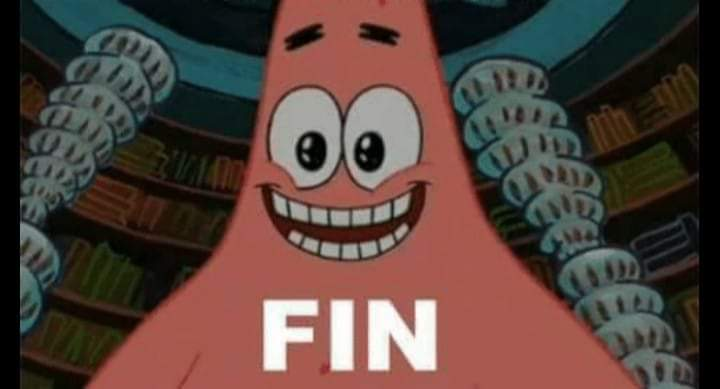